In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def analyze(filename, k=8):
    df = pd.read_csv(filename)
    df = df[['Symbol', 'Last', 'Open.Int', 'Delta']]
    df['Ticker'] = df['Symbol'].str.extract(r'([A-z]{1,4})')
    
    m = {}
    for row in df.iterrows():
        obj = row[1]
        ticker = obj['Ticker']
        delta = float(obj['Delta'])
        last = float(obj['Last'])
        open_int = int(obj['Open.Int'].replace(',', ''))
        amount = last * open_int * 100

        if ticker in m:
            if delta > 0:
                m[ticker] += amount
            else:
                m[ticker] -= amount
        else:
            if delta > 0:
                m[ticker] = amount
            else:
                m[ticker] = amount
                
    l = list(m.items())
    l = list(map(lambda x: (x[0], round(x[1]) / 1000000), l))
    l = sorted(l, key=lambda x: x[1])
    l = l[0:k] + l[-k:]
    
    tickers = list(map(lambda x: x[0], l))
    y_pos = np.arange(len(tickers))
    flow = list(map(lambda x: x[1], l))

    plt.bar(y_pos, flow, align='center', alpha=0.8)
    plt.xticks(y_pos, tickers)
    plt.xticks(rotation=45)
    plt.ylabel('$ Millions')
    plt.title('Net Option Flow')
    plt.grid(True)

    plt.show()

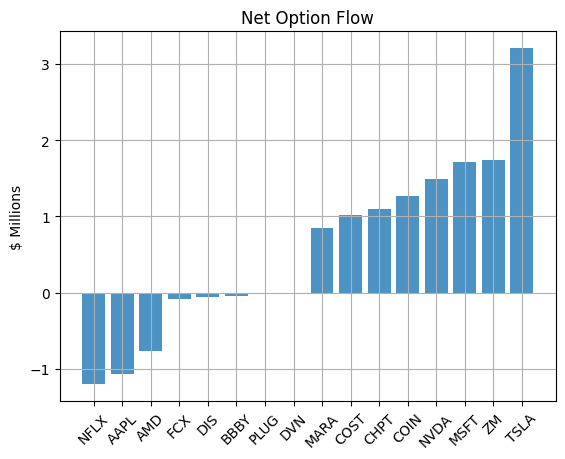

In [3]:
analyze('short-term.csv')

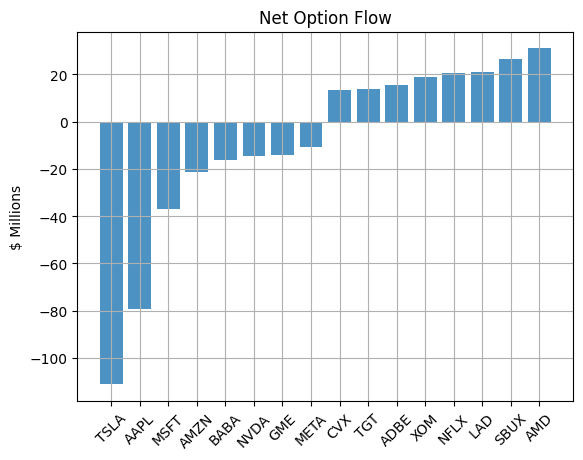

In [4]:
analyze('long-term.csv')